<img src="images/TRU_Logo_Horizontal_RGB-colour37470.png" width=600 />
<!-- The line above is html code. This line is html comment, it won't affect the output -->

# Physics 2200 - Mechanics
## Project 2 - Energy conservation and second order integration methods

2Welcome to Project 2. In this project we will study the harmonic oscillator. In the process, we will revisit Euler's method and explore some of its limitations and the most common alternatives. First, we import the same libraries as in project 1.

In [2]:
import matplotlib.pyplot as plt
import PhysPlot
import numpy as np

## Problem 1: Simple Harmonic Oscillator - Euler's method (1 point)
Let's start with the **simple** harmonic oscillator (SHO), without damping or a forcing function.

Start by creating a code to numerically integrate the SHO equation using Euler's method. **Spoiler alert**: there will be a problem with Euler's method here, and we will need to use a different one, but don't worry about it just yet. 

The differential equation for the SHO is $\ddot{x} = -\frac{k}{m}x$. Notice that the force depends on position here, not the velocity, like in project 1. This means Euler's method involves three calculations for each time step. A general time step will look like this:

$a_n = -\frac{k}{m} x_n \qquad\quad$       Find acceleration from position in current time step.

$v_{n+1} = ??? \qquad\qquad$                Find velocity at next time step from acceleration in current time step (you need to fill in here).

$x_{n+1} = ??? \qquad\qquad$                Find position at next time step from velocity in current time step (you need to fill in here).

Start by defining the spring constant $k$ and the mass $m$. You also need to set up initial conditions as well as defining a time step size. Then you need to create arrays to hold the time, position and velocity values for every time point. Finally, you need a **for** loop to do the calculations for $a$, $v$ and $x$. Make sure you chose a final time that is enough for many oscillations to happen (about 10).

After the calculation is done, plot the position $x$ of the oscillator as a function of time. Do you see a problem with it? 

Another way to see the same problem is by plotting the total energy of the oscillator ($T + V$) as a function of time. Calculate the kinetic energy ($T$) and the potential energy ($V$) for every time point in the motion. You can do this easily because Python interprets algebraic operations on arrays element-wise. For example, if $v$ is the array with velocitiess, the expression $0.5$ * $m$ * $v$\**$2$ returns another array with the kinetic energy corresponding to each velocity element! Python is squaring each element in $v$ and then multiplying each result by $0.5$ * $m$. You can do a similarly easy calculation for the potential energy using the position array.

Summing arrays is also done element-wise. If $T$ is the kinetic energy array and $V$ is the potential energy array, $T + V$ returns an array with the total energy for every time point!

Plot the total energy as a function of time. What is wrong with this plot?

The final energy is 2301.35 % of the inital energy,
which is not within 1%


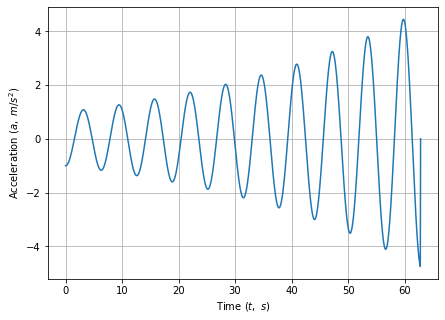

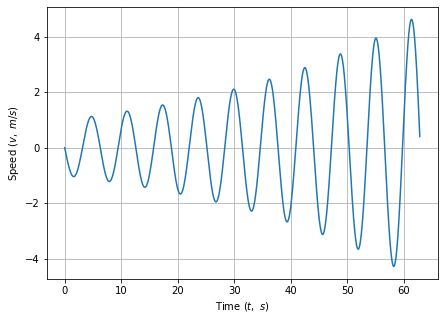

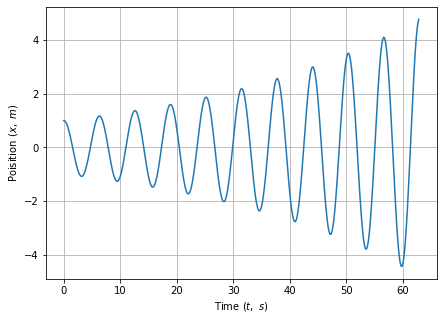

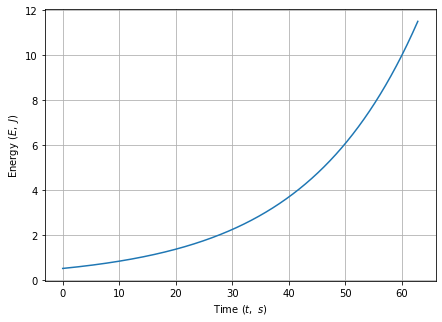

In [3]:
# RK2 Method integration of the SHO here.

k = 1 # spring constant in N/m
m = 1 # mass in kg
w0 = np.sqrt(k/m) # calculate angluar frequency
tf = 10*2*np.pi/w0 # run for 10 periods
dt = 0.05 # time step
x0 = 1 # inital position in m
v0 = 0 # inital velocity in m/s

# initalize arrays and set inital values
t = np.arange(0,tf,dt)
a = np.zeros(len(t))
v = np.zeros(len(t))
v[0] = v0
x = np.zeros(len(t))
x[0] = x0

# Euler method loop
for i in range(0, len(t)-1):
    a[i] = - k/m * x[i]
    v[i+1] = v[i] + dt * a[i]     
    x[i+1] = x[i] + dt * v[i]

# calculate energies
T = 0.5*m*v**2
V = 0.5*k*x**2
E = T + V

# plot a, v, x, and total energy    
PhysPlot.plot(t, a, r"Time ($t,$ $s$)", r"Acceleration ($a,$ $m/s^2$)")
PhysPlot.plot(t, v, r"Time ($t,$ $s$)", r"Speed ($v,$ $m/s$)")
PhysPlot.plot(t, x, r"Time ($t,$ $s$)", r"Poisition ($x,$ $m$)")
PhysPlot.plot(t, E, r"Time ($t,$ $s$)", r"Energy ($E,$ $J$)")

# get percent difference and report if within 1%
print("The final energy is", round(E[len(t) - 1]/E[0]*100,2), "% of the inital energy,")
if(99 < E[len(t) - 1]/E[0]*100 < 101):
    print("which is within 1%")
else:
    print("which is not within 1%")

The energy increases rapidly from the errors in the euler method. Due to these errors the position, velicoity, and acceleration all increase in amplitude which they should not for the simple harmonic oscilator.

It is clear that something is wrong with Euler method here. Your plots will have shown that the amplitude of oscillations and the total energy are increasing with time indefinitely! But this is a conservative system! The total energy should be constant!

Remember that there is always an error associated with the linearization of the equation between time points. Most of the time, the errors incurred at each step go in "*random directions*". This means that sometimes the error **increases** the velocity (or energy) a bit away from the true value and sometimes it **decreases** it a bit. Over time, these arrors mostly cancel out and the velocity, position and energy are always a little bit off the mark, but don't tend to run off wildly off mark.

It just so happens that in the harmonic oscillator case, the errors always go in the "*same direction*" of increasing the energy. Therefore the errors don't cancel out, but compound over time, leading to the run-off you have seen.

If you decrease the time step, the energy problem becomes smaller because the errors in each step become smaller. But you can never make the problem go away completely, you probably can see the energy still increase, albeit at a smaller rate. Try playing a little bit with the time step size and seeing how the energy plot changes.

**Note:** If you didn't see the energy increase with time in your plots, you might have used a very fine (small) time step. Try increasing it and plotting again.

It is not always obvious whether a system will lead to compounding errors like that. The problem here is related to the fact that the Euler method is "*unilateral*". It uses the value of $a$ or $v$ on the "*left*" of the time step as an approximation for the whole time step. A good practice is to use a more "*symmetric*" method that takes into account the values of $a$ or $v$ on both sides of the time step.

# Higher order methods
The Euler method can be seen as the *first order* approximation of a function in a Taylor expansion:

$v(t + \Delta t) \approx v(t) + \frac{dv}{dt}(t) \Delta t$

A natural way to improve the precision of our numerical calculation would be to keep higher order terms in the Taylor expansion. This is inconvenient, however, because it requires computing higher order (and sometimes partial) derivatives of the function. It turns out it is possible to create more complex algorythms that incorporate the information about higher order terms without computing derivatives. These are called higher order integration methods and there are many types available. In the next section we will study one possible example.

## Runge-kutta method
Let's take a look at the error incurred by the Euler method again. On the plot on the left, we can see that the error is large because we are using the value of the derivative on the left point as an aproximation for the whole time step. It seems that a better approximation would be obtained by using the value of the derivative at the centre of the time step (think about the *mean value theorem*). This is the idea behind the Runge-Kutta method, shown in the plot on the right.

<img src="images/euler.jpg" width=400 style="float:left"/>
<img src="images/rk2.jpg" width=400 style="float:right"/>

Notice how the error is much smaller in this case. It is possible to show that the Runge-Kutta method effectively incorporates information about the curvature of the function, making it a *second-order* method. This means the errors at each time step are proportional to $\Delta t^2$, similar to what one would get by keeping the quadratic term in a Taylor expansion.

This sounds wonderful, but there is a cost. The Runge-Kutta method involves more calculations per step, making it slower than the Euler method for the same number of steps. It is still worth using, because you can achieve the same precision with less steps. 

**Additionally, it is a more "*symmetric*" method and avoids the energy run-off we saw before, as you will show shortly.**

To use the Runge-Kutta method we need to find an approximation for the acceleration at the centre of the time step. In general, the acceleration (or the force) is a function of position $x$ and/or velocity $v$, that is, $a = \ddot{x} = f(\dot{x},x,t)$. This means we need to find approximations for $x$ and/or $v$ at the centre of the time step. This is usually done using the Euler method. Here is what one iteration would look like:

1. &nbsp; &nbsp; $a_i = f(v_i, x_i, t_i)$ &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; Given the initial conditions $x_i$ and $v_i$, calculate the initial value for the acceleration.

2. &nbsp; &nbsp; $\tilde{t} = t_i + \frac{\Delta t}{2}$ &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; Calculate the value of the time at the centre of the time step (called $\tilde{t}$).

3. &nbsp; &nbsp; $\tilde{x} = x_i + v_i \frac{\Delta t}{2}$ &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Find an approximation for the position at the centre (called $\tilde{x}$) using the Euler method.

4. &nbsp; &nbsp; $\tilde{v} = v_i + a_i \frac{\Delta t}{2}$ &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Find an approximation for the velocity at the centre (called $\tilde{v}$) using the Euler method.

5. &nbsp; &nbsp; $\tilde{a} = f(\tilde{v}, \tilde{x}, \tilde{t})$ &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Find an approximation for the acceleration at the centre (called $\tilde{a}$) using the values for $\tilde{v}$, $\tilde{x}$, and $\tilde{t}$.

6. &nbsp; &nbsp; $x_{i+1} = x_i + \tilde{v}\Delta t$ &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; Compute the value of the position for the next time step using the centre value for the velocity ($\tilde{v}$).

7. &nbsp; &nbsp; $v_{i+1} = v_i + \tilde{a}\Delta t$ &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; Compute the value of the velocity for the next time step using the centre value for the acceleration ($\tilde{a}$).

(Notice that in the case of the SHO, the acceleration only depends on $x$. So in steps $1$ and $5$ above $f=f(x)$. Additionally, we can skip step $2$ altogether).

Notice that the Runge Kutta-Method involves twice as many computations per step as the Euler method. It also requires the use of the Euler method to estimate the values of $x$ and $v$ at the centre of the time step. The method described above is the *second order* Runge-Kutta method (RK2). There are many more versions of the method, with the 4th order Runge-Kutta method (RK4) being widely used in reasearch and industry. We will stick to RK2 here since it illustrates most aspects of higher order methods.

## Problem 2: Simple Harmonic Oscillator - RK2 method (1 point)
In this problem you should re-do the SHO integration using the RK2 method. You can again copy most of your code from problem 1, changing only the part corresponding to the RK2 method instead of the Euler method.

Answer these questions:

1) Does the RK2 method solves the energy increasing problem completely? Or do you still see the energy increase (albeit more slowly)?
2) If the energy still increases, try reducing the value of the time step $dt$. How small must you make $dt$ so that the energy doesn't change by more than $1\%$ over the time of your integration?
3) Go back to your Euler method code (in question 1). How much does the energy increase there (in $\%$) for the same parameters (same $k$, $m$, $x_0$, $v_0$, time step $dt$ and final time $t_f$) as you used in question 2 above?

Note: Even though RK2 is a little bit more "symmetric", it is still a "forward going" method. There are "completely symmetric" methods that will make the energy not increase at all in the SHO problem. For our purposes, however, RK2 will be good enough.

The final energy is 100.2 % of the inital energy,
which is within 1%


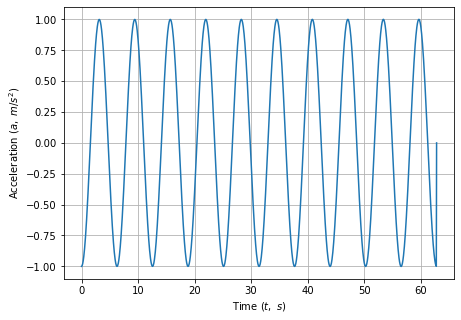

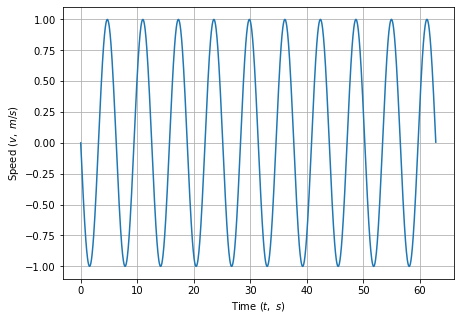

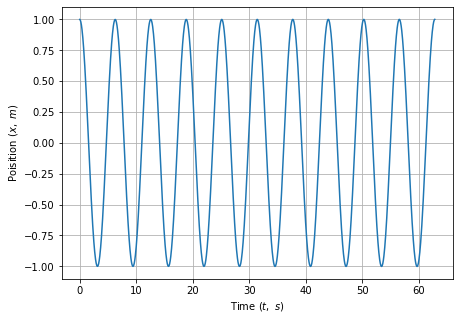

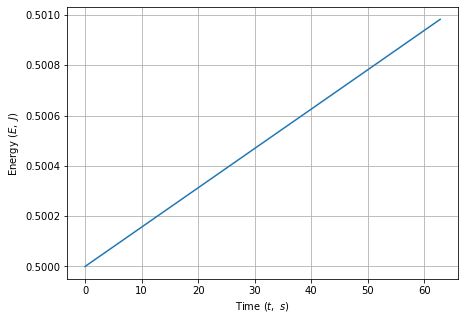

In [4]:
# RK2 Method integration of the SHO here.

# reuse inital values from problem 1

# k = 1 # spring constant in N/m
# m = 1 # mass in kg
# w0 = np.sqrt(k/m) # calculate angluar frequency
# tf = 10*2*np.pi/w0 # run for 10 periods
# dt = 0.05
# x0 = 1 # inital position in m
#v0 = 0 # inital velocity in m/s

# initalize arrays and set inital values
# t = np.arange(0,tf,dt)
ai = np.zeros(len(t))
vi = np.zeros(len(t))
vi[0] = v0
xi = np.zeros(len(t))
xi[0] = x0

# RK2 method loop
for i in range(0, len(t) - 1):
    ai[i] = - k/m * xi[i] # 1
    xt = xi[i] + 0.5*vi[i]*dt # 3
    vt = vi[i] + 0.5*ai[i]*dt # 4
    at = - k/m * xt # 5
    xi[i+1] = xi[i] + dt * vt # 6
    vi[i+1] = vi[i] + dt * at # 7

# calculate energies
T = 0.5*m*vi**2
V = 0.5*k*xi**2
E = T + V
    
# plot a, v, x, and total energy    
PhysPlot.plot(t, ai, r"Time ($t,$ $s$)", r"Acceleration ($a,$ $m/s^2$)")
PhysPlot.plot(t, vi, r"Time ($t,$ $s$)", r"Speed ($v,$ $m/s$)")
PhysPlot.plot(t, xi, r"Time ($t,$ $s$)", r"Poisition ($x,$ $m$)")
PhysPlot.plot(t, E, r"Time ($t,$ $s$)", r"Energy ($E,$ $J$)")

# get percent difference and report if within 1%
print("The final energy is", round(E[len(t) - 1]/E[0]*100,2), "% of the inital energy,")
if(99 < E[len(t) - 1]/E[0]*100 < 101):
    print("which is within 1%")
else:
    print("which is not within 1%")

## Problem 3: Damped Oscillator (2 points)

In this problem you have to write a code for the damped oscillator using RK2. Remember the equation of motion for the damped oscillator is 

$$m\ddot{x} + c\dot{x} + kx = 0$$

As you know, there are three possible cases here:
* Over-damped
* Critically damped
* Under-damped

You should write code for all three cases and plot the results for all three in a single plot. Chose the same initial conditions for all three so we can see how they approach zero in different ways. Keep the spring constant $k$ the same for all three cases and pick the damping constant $c$ so as to have the desired behaviour in each case. (Recall how $\omega_0$ and $\gamma$ relate to $k$ and $c$).

Play a little bit with the values of $t_f$ and $c$, so that the over-damped case shows a nice curve slowly going to zero at the end of the time range and the under-damped case shows clearly a few osscillations while decreasing in amplitude slowly. 

In this problem you will have to run the integration three times (one for each damping case) and store the results. This means you will need three arrays to store $x$ and three to store $v$, one for each case of damping (over, critical and under-damping). You can do that by creating three arrays with different names, for example:

Solving the equation:

$m\ddot{x} + c\dot{x} + kx = 0$,

for acceleration gives:

$\ddot{x} = - \frac{c\dot{x}}{m} - \frac{kx}{m}$.

Which can be used to calculate the acceleration at time $i$:

$a_i = - \frac{cv_i}{m} - \frac{kx_i}{m}$.

In [5]:
vo = np.zeros(len(t))  ## Arrays to hold the values for the over-damped case
xo = np.zeros(len(t))

vc = np.zeros(len(t))  ## Arrays to hold the values for the critically damped case
xc = np.zeros(len(t))

vu = np.zeros(len(t))  ## Arrays to hold the values for the under-damped case
xu = np.zeros(len(t))

Because you will have to run similar code three times in this problem, here is a suggestion to avoid long code by using a Python function.
#### Suggestion: Using a function to compute one step of the RK2 method.
To avoid re-writting the same code, you can create a function whose purpose is to compute one step of the RK2 integration. We define functions in Python by the keyword **def** followed by the name of the function, the arguments in brackets and a colon. The code to be executed comes below this initial line. It should be indented like the code inside of a **for** loop. The function ends with the keyword **return** followed by the value that should be returned by the function.

Let's call our function **rk2**. Here is what your **rk2** function will look like (don't try running the cell below as it will give an error):

In [6]:
def rk2(xi, vi, k, m, c):             
    a = - c*vi/m - k/m*xi             # Put the code to compute accelleration with the Euler method here.
    vt = vi + 0.5*a*dt                # v_tilde -> estimate velocity at centre of time step using the Euler method
    xt = xi + 0.5*vi*dt               # x_tilde -> estimate position at centre of time step using the Euler method
    at = -c*vt/m- k*xt/m              # a_tilde -> estimate acceleration at the centre of time step
    
    vf = vi + dt*a                    # Velocity at next time point with the RK2 method
    xf = xi + dt*vt                   # Position at next time point with the RK2 method
    
    return xf, vf

* Notice that the arguments to the function are $x_i$, $v_i$ and also $k$, $m$, and $c$. This way you can change the value of $c$ to compute steps for each of the three damping cases.
* You have to add code for the first 6 lines inside the function to do computations for the RK2 method.
* The last line, with the **return** statement, can be left unchanged. Notice you can return two values at once, in this case $x_f$ and $v_f$, the values at the end of the time step.

Now you can run the integration for each damping case without having to re-write the code for the RK2 method! Here is more or less what the structure of your code could look like (don't try running the cell below as it will give an error):

In [11]:
# Define parameters k, m, dt and tf here. Also define the time array "t".
# Also define and initialize all arrays to hold the values of "x" and "v".

k = 2 # spring constant in N/m
m = 0.5 # mass in kg
w0 = np.sqrt(k/m) # calculate angluar frequency
tf = 10*2*np.pi/w0 # run for 10 periods
dt = 0.01 # time step
x0 = 1 # inital position in m
v0 = 0 # inital velocity in m/s

# initalize arrays and set inital values for all 3 cases
t = np.arange(0,tf,dt)
vo = np.zeros(len(t))
vo[0] = v0
xo = np.zeros(len(t))
xo[0] = x0
vc = np.zeros(len(t))
vc[0] = v0
xc = np.zeros(len(t))
xc[0] = x0
vu = np.zeros(len(t))
vu[0] = v0
xu = np.zeros(len(t))
xu[0] = x0


# Over-damped
#############
c =  10*w0              # Define "c" for the over-damped case here
for i in range(0, len(t)-1):   # This is how you create an iterator loop in Python.
    xo[i+1], vo[i+1] = rk2(xo[i], vo[i], k, m, c)

# Critically damped
###################
c = w0               # Define "c" for the critically damped case here
for i in range(0, len(t)-1):   # This is how you create an iterator loop in Python.
    xc[i+1], vc[i+1] = rk2(xc[i], vc[i], k, m, c)
    
# Under-damped
##############
c = 0.1*w0               # Define "c" for the under-damped case here
for i in range(0, len(t)-1):   # This is how you create an iterator loop in Python.
    xu[i+1], vu[i+1] = rk2(xu[i], vu[i], k, m, c)

In the end, your plot should look something like this:

<img src="images/damping_cases.jpg" width=400 style="float:left"/>

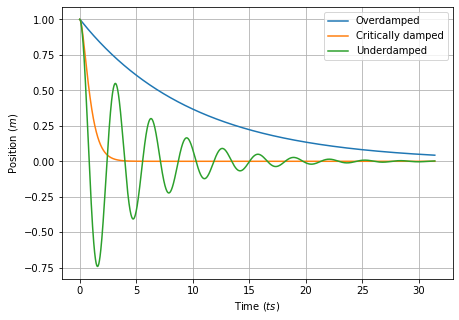

In [12]:
PhysPlot.multiplot(t, [xo,xc,xu], ["Overdamped","Critically damped", "Underdamped"], r"Time ($ts$)", r"Position ($m$)")

## Problem 4: Driven, damped oscillator (3 points)

In this problem you have to write a code for the driven and damped oscillator using RK2. Remember the equation of motion for the damped oscillator is 

$$m\ddot{x} + c\dot{x} + kx = f(t)$$

We are interested here in a sinusoidal forcing function: $f(t) = f_0 \cos (\omega t)$

You can re-use most of your code from Problem 3. All you need to do is add the forcing function. I suggest you use the same $k$ and $c$ parameters you did in problem 3, this way you will have a clear idea of how long the transient responses last and when the steady-state response should take over (more on this below).

Remember that the response of a driven harmonic oscillator depends heavily on the driving frequency $\omega$. In this problem, we would like to investigate this dependence. To keep things simple you should keep the magnitude of the driving force ($f_0$) the same for all cases in this problem and just vary the value of the driving frequency $\omega$.

#### Part (a)
Plot the position $x(t)$ of the oscillator as a function of time for three different values of the driving frequency $\omega$. Pick one value way lower than the resonant frequency, one value near the resonant frequency and one value way higher than the resonant frequency (we derived an expression for the resonant frequency in class).

You will again need to do the integration for three different cases and store the results. You might want to use a function for the integration step again. Only now, this function needs to be able to recive the parameter $\omega$, so you can solve for different values of it.

Remember that the general solution ot the driven oscillator is the sum of the natural solution and the driven solution. The natural solution is just what you got in problem 3. If you kept the same values for the parameters $k$, $m$, $c$ and the initial conditions, then it should be exactly the same function here. Because the natural solution dies out exponentially, it is called a **transient** solution. By looking at your plots from problem 3, you can have a good idea of how long it takes for the transient solution to become very small (close to zero).

The driven solution is just a cosine function that oscillates at the driven frequency $\omega$. This one doesn't die out, so it is called a **steady-state** solution.

For your plots, you should pick a final time $t_f$, that is long enough so that the transient solution has completely died out at about **half** of the final time. This way you can see the steady-state cosine function in the second half of yout time axis.

<img src="images/transients.jpg" width=400 style="float:right"/>

These are the parameters I used:
* k = 100                        (Spring constant)
* c = 4                          (Damping constant)
* m = 1                          (Mass of the particle)
* dt = .01                       (Size of time steps)
* tf = 6                         (Final time)

And here is what your plot should look like, approximately: 

Notice that in the second (right) half of my time axis, the three solutions have become stable cosine functions. They have different frequencies (because the oscillator is being driven at different frequencies in each case) and also different amplitudes! Notice that the one closer to the resonant frequency (yellow) has the largest amplidute.


In [52]:
# Define parameters k, m, dt and tf here. Also define the time array "t".
# Also define and initialize all arrays to hold the values of "x" and "v".

k = 2 # spring constant in N/m
m = 0.5 # mass in kg
w0 = np.sqrt(k/m) # calculate angluar frequency
tf = 15*2*np.pi/w0 # run for 25 natural periods
dt = 0.01 # time step
x0 = 1 # inital position in m
v0 = 0 # inital velocity in m/s

f0 = 0.01

# initalize arrays and set inital values for all 3 cases
t = np.arange(0,tf,dt)
v1 = np.zeros(len(t))
v1[0] = v0
x1 = np.zeros(len(t))
x1[0] = x0
v2 = np.zeros(len(t))
v2[0] = v0
x2 = np.zeros(len(t))
x2[0] = x0
v3 = np.zeros(len(t))
v3[0] = v0
x3 = np.zeros(len(t))
x3[0] = x0


# Over-damped
#############
c =  0.1*w0              # Define "c" for the over-damped case here
wr = 0.5*np.sqrt(w0**2 - 2*c**2)
for i in range(0, len(t)-1):   # This is how you create an iterator loop in Python.
    x1[i+1], v1[i+1] = rk2(x1[i] - f0*np.cos(wr*t[i]), v1[i] - wr*f0*np.sin(wr*t[i]), k, m, c)

# Critically damped
###################
c = 0.1*w0               # Define "c" for the critically damped case here
wr = np.sqrt(w0**2 - 2*c**2)
for i in range(0, len(t)-1):   # This is how you create an iterator loop in Python.
    x2[i+1], v2[i+1] = rk2(x2[i] - f0*np.cos(wr*t[i]), v2[i] - wr*f0*np.sin(wr*t[i]), k, m, c)
    
# Under-damped
##############
c = 0.1*w0               # Define "c" for the under-damped case here
wr = 2*np.sqrt(w0**2 - 2*c**2)
for i in range(0, len(t)-1):   # This is how you create an iterator loop in Python.
    x3[i+1], v3[i+1] = rk2(x3[i] - f0*np.cos(wr*t[i]), v3[i] - wr*f0*np.sin(wr*t[i]), k, m, c)

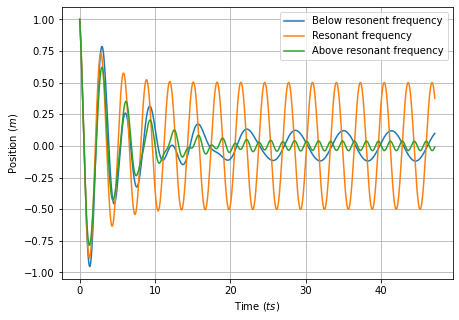

In [53]:
PhysPlot.multiplot(t, [x1,x2,x3], ["Below resonent frequency","Resonant frequency", "Above resonant frequency"], r"Time ($ts$)", r"Position ($m$)")

#### Part (b)
Now we want to investigate in more detail the dependence of the steady-state response amplitude with the driving frequency.
Here is what you need to do: 
* Find the solution for the driven oscillator for a wide range of values of the driving frequency $\omega$. You should do this for at least 30 or 40 values of $\omega$ ranging from much smaller to much larger than the resonant frequency.
* For each case, you need to compute what the amplitude of the steady-state response is. More on this below.
* Plot the value of the amplitude of the response as a function of driving frequency $\omega$.
* In the same graph, plot the analytic, exact, function of the amplitude with frequency that we derived in class. Show that they match each other.

I have added a cell with the basic structure of a code to solve this problem below. Here are a few suggestions that explain some of my choices in the code:

##### Suggestion 1
Because you are going to run the integration many times, you will want to do this inside a **for** loop, so you don't have to write 50 times the same code. The integration itself is another **for** loop, so this means you will have two *nested* **for** loops in your code.
##### Suggestion 2
Create an array containing all the values of $\omega$ you will solve for. In my example code below, this array is called *oms* and it goes from 4 to 16 in steps of 0.15 (your numbers might need to be different if you use different values for $k$ and $c$). You will use this array as the time axis of your plot.
##### Suggestion 3
Notice how you can also use this array as the input to the **for** loop! In this syntax, the value of the variable **om** will loop through all the elements of the array **oms**.
##### Suggestion 4
You should create an array to hold the values of the amplitudes. This array should have the same length as **oms**. At each iteration, after computing the values of $x(t)$, you should find the amplitude of the steady-state response and store it in the corresponding entry of the amplitudes array.
##### Suggestion 5
How to find the amplitude of the steady-state response? Here is one possible way. If you kept all parementers the same as they were for **part (a)** (except for $\omega$), then you know that the second half of your $x(t)$ array is dominated by the steady-state response alone. You can select only this later part of your values for $x(t)$ by doing a Python *slice*. For example, if your $x$ array has 500 entries and you want to pick the last 200 of them, you can just do: **x[300:]** (notice the colon). This returns a new array with only the entries of the original array after entry $300$. 
##### Suggestion 6
Now that you know how to slice your $x$ array, so that it contains only the steady-state response, one way to find the amplitude is to find the largest value in this new, sliced, array. You can do this with the Numpy function **np.amax()**. For example, **np.amax(x[300:])** will return the larges value in the array **x** but consider only the entries after $300$.
##### Suggestion 7
Don't try to create arrays for $x(t)$ for allvalues of $\omega$. In the code below, I just re-define $x$ as an array of zeroes in each iteration of the outer for loop. This means you loose all the values for $x(t)$ you computed in the previous iterations. It doesn't matter, however, because we are storing the solutions amplitude at each iteration, which is what we are interested in.

Here is the structure of a code to implement these suggestions (don't try running the cell below as it will probably give an error):

In [8]:
# RK2 Method integration of the driven, damped HO

# Define parameters k, m, c, f0, dt, tf, v0 and x0 here. Also define the time array "t".

# Define the function "rk2" to compute one step of the integration here. 
# Remember it needs to accept an argument for the driving frequency omega, in addition to the current values of x and v.


amplitudes = []
for ii in range(len(xx)):
    amplitudes.append(np.amax(abs(xx[ii][mask])))

oms = np.arange(4, 16, 0.15)       # Define array with all values of omega to solve for.
amps = np.zeros(len(oms))          # Array to hold the amplitude values. Should be the same size as "oms". 
for j in range(0, len(oms)):       # For-loop to iterate over all values of omega.
    om = oms[j]                    # Assign the value of omega for this iteration.
    v = np.zeros(len(t))           # Creates an array the same size as t that is all zeroes. Will contain the solutions to the velocity at every time step.
    x = np.zeros(len(t))           # Creates an array the same size as t that is all zeroes. Will contain the solutions to the position at every time step.
    v[0] = v0                      # Assign the value of the first entry of the velocity array with the initial condition. Python arrays are zero-based.
    x[0] = x0                      # Assign the value of the first entry of the position array with the initial condition. Python arrays are zero-based.
    # Run the loop
    for i in range(0, len(t)):     # For-loop to do the integration for this value of omega.
        x[i+1], v[i+1] = rk2(t[i], x[i], v[i], om)    # Call function "rk2" to campute one integration step.
        
    # This code come after the for loop for the integration is over (because of the indentation). 
    amps[j] = np.amax(x[:300])     # Compute the amplitude for this value of omega. I slice the "x" array from entry 300. You might have to use a different value.


NameError: name 'xx' is not defined

After computing the amplitudes you should plot it against the values of omega. You should also plot the analytic solution we derived in class to compare both of them. Here is what your plot might look like:

<img src="images/amplitude.jpg" width=400 style="float:left"/>

## Problem 5 - Solve C3.2 - Modified (2 points)

For a damped harmonic oscillator, with a quadratic damping force, the equation of motion is

$$\ddot{x} + 2\gamma\dot{x}|\dot{x}| + \omega_0^2 x = 0$$

where $\gamma = c_2/2m$ and $\omega_0^2 = k/m$. Find $x(t)$ by numerically integrating the above equation of motion. Let $\gamma = 0.20 m^{-1}$ and $\omega_0 = 2.00$ rad/s. Let the initial conditions be $x(0) = 1.00$ m and $\dot{x} = 0$ m/s.

a) Plot $x(t)$ from $t=0$ to $t = 20$ s. On the same plot, plot the linear drag case with the same $\gamma$ and $\omega_0$ values.

b) Repeat part (a) but change the value of $\gamma$ so that the linear drag oscillator is critically damped. Plot the quadratic drag oscillator with the same new value for $\gamma$. What do you observe? Is the quadratic drag oscillator also critically damped?

c) Try increasing $\gamma$ even more. Can you find a value for $\gamma$ that will result in critical damping for the quadratic case (no oscillations)? If no such $\gamma$ can be found, then find a value that limits the first negative excursion of the oxcillator to less than 2% of the initial amplitude.

In [ ]:
# Problem C3.2

